In [32]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [33]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
plt.rcParams.update({'font.size': 22})

In [35]:
folder = Path("../../../Slides")

In [36]:
slides_cat = ["BAL_Cat_Turnbull blue_1.svs", 
                         "BAL_Cat_Turnbull blue_6.svs", 
                         "BAL_Cat_Turnbull blue_14.svs", 
                         "BAL_Cat_Turnbull blue_13.svs", 
                         "BAL_Cat_Turnbull blue_2.svs", ]

equine_train = ["15_EIPH_568320 berliner blau.svs", 
                         "22_EIPH_575216 Berliner Blau.svs", 
                         "30_EIPH_588355 Berliner Blau.svs", 
                         "19_EIPH_566933 L Tunrbull blue.svs", 
                         "02_EIPH_574162 Turnbull blue-001.svs", 
                        ]

human_train = ["2707_20 TB BAL Human neu.svs", 
                         "11480_19 humane BAL Berliner Blau.svs", 
                         "10080_19 humane BAL Berliner Blau-001.svs", 
                         "10052_19 humane BAL Berliner Blau-001.svs", 
                         "10120_19 humane BAL Berliner Blau.svs" 
                        ]

In [37]:
grade_list = [0, 1]
annotations_path = Path("../EIPH_Screening_Annotations.pkl")
annotations = pd.read_pickle(annotations_path)
annotations = annotations[annotations["grade"].isin(grade_list)]
annotations.head()

,id,image_id,image_set,species,image_name,image_type,grade,vector,unique_identifier,user_id,deleted,last_editor,data_set_name,version
0,1049539,3512,222,Cat,BAL_Cat_Turnbull blue_1.svs,Turnbull,0,"{'x1': 9903.0, 'x2': 10029.0, 'y1': 5508.0, 'y...",875aab61-3f1f-429a-a053-f87aba6c99da,1,False,1,SDATA,Screened
1,1049548,3512,222,Cat,BAL_Cat_Turnbull blue_1.svs,Turnbull,0,"{'x1': 12243.0, 'x2': 12375.0, 'y1': 14740.0, ...",d718f087-7a46-4e22-8610-ba5f82d04818,1,False,1,SDATA,Screened
2,1049551,3512,222,Cat,BAL_Cat_Turnbull blue_1.svs,Turnbull,0,"{'x1': 20253.0, 'x2': 20366.0, 'y1': 4149.0, '...",7e9cc21f-4a51-4d12-99dd-daffa3e6f368,1,False,1,SDATA,Screened
3,1049568,3512,222,Cat,BAL_Cat_Turnbull blue_1.svs,Turnbull,0,"{'x1': 2906.0, 'x2': 3030.0, 'y1': 16767.0, 'y...",0a546034-021b-4739-82bf-b09c7a5226d5,1,False,1,SDATA,Screened
4,1049624,3512,222,Cat,BAL_Cat_Turnbull blue_1.svs,Turnbull,0,"{'x1': 11203.0, 'x2': 11328.0, 'y1': 7867.0, '...",52536c1e-32f3-4a15-9c08-0350c0ad1b2b,1,False,1,SDATA,Screened


In [38]:
for image_name in slides_cat+equine_train+human_train:
    
    annos = len(annotations[annotations["image_name"]==image_name])
    
    print(f"{image_name}: {annos}")

BAL_Cat_Turnbull blue_1.svs: 3487
BAL_Cat_Turnbull blue_6.svs: 3904
BAL_Cat_Turnbull blue_14.svs: 2888
BAL_Cat_Turnbull blue_13.svs: 5473
BAL_Cat_Turnbull blue_2.svs: 559
15_EIPH_568320 berliner blau.svs: 6008
22_EIPH_575216 Berliner Blau.svs: 4588
30_EIPH_588355 Berliner Blau.svs: 5279
19_EIPH_566933 L Tunrbull blue.svs: 2209
02_EIPH_574162 Turnbull blue-001.svs: 4654
2707_20 TB BAL Human neu.svs: 4388
11480_19 humane BAL Berliner Blau.svs: 1612
10080_19 humane BAL Berliner Blau-001.svs: 3299
10052_19 humane BAL Berliner Blau-001.svs: 1859
10120_19 humane BAL Berliner Blau.svs: 2337


In [39]:
cells_per_image = {
    "CatVsCat-Ablation_0": 5473,
    "CatVsCat-Ablation_1": 5473+3904,
    "CatVsCat-Ablation_2": 5473+3904+3284,
    "CatVsCat-Ablation_3": 5473+3904+3284+2888,
    "CatVsCat-Ablation_4": 5473+3904+3284+2888+559,
    
    "EquineVsEquine-Ablation_0": 4747,
    "EquineVsEquine-Ablation_1": 4747+3285,
    "EquineVsEquine-Ablation_2": 4747+3285+4283,
    "EquineVsEquine-Ablation_3": 4747+3285+4283+3158,
    "EquineVsEquine-Ablation_4": 4747+3285+4283+3158+5350,
    
    "HumanVsHuman-Ablation_0": 4388,
    "HumanVsHuman-Ablation_1": 4388+3299,
    "HumanVsHuman-Ablation_2": 4388+3299+1859,
    "HumanVsHuman-Ablation_3": 4388+3299+1859+2973,
    "HumanVsHuman-Ablation_4": 4388+3299+1859+2973+3208,
}

cells_per_patch = {
    "CatVsCat-Ablation_Patches_1": 5,
    "CatVsCat-Ablation_Patches_2": 10,
    "CatVsCat-Ablation_Patches_4": 16,
    "CatVsCat-Ablation_Patches_8": 21,
    "CatVsCat-Ablation_Patches_16": 80,
    "CatVsCat-Ablation_Patches_32": 146,
    "CatVsCat-Ablation_Patches_64": 304,
    "CatVsCat-Ablation_Patches_128": 648,
    "CatVsCat-Ablation_Patches_256": 1190,
    "CatVsCat-Ablation_Patches_512": 2765,
    "CatVsCat-Ablation_Patches_1024": 4813,
    
    
    "EquineVsEquine-Ablation_Patches_1": 4,
    "EquineVsEquine-Ablation_Patches_2": 8,
    "EquineVsEquine-Ablation_Patches_4": 17,
    "EquineVsEquine-Ablation_Patches_8": 30,
    "EquineVsEquine-Ablation_Patches_16": 60,
    "EquineVsEquine-Ablation_Patches_32": 116,
    "EquineVsEquine-Ablation_Patches_64": 243,
    "EquineVsEquine-Ablation_Patches_128": 502,
    "EquineVsEquine-Ablation_Patches_256": 942,
    "EquineVsEquine-Ablation_Patches_512": 1905,
    "EquineVsEquine-Ablation_Patches_1024": 4178,

    
    "HumanVsHuman-Ablation_Patches_1": 4,
    "HumanVsHuman-Ablation_Patches_2": 8,
    "HumanVsHuman-Ablation_Patches_4": 14,
    "HumanVsHuman-Ablation_Patches_8": 35,
    "HumanVsHuman-Ablation_Patches_16": 63,
    "HumanVsHuman-Ablation_Patches_32": 120,
    "HumanVsHuman-Ablation_Patches_64": 259,
    "HumanVsHuman-Ablation_Patches_128": 548,
    "HumanVsHuman-Ablation_Patches_256": 1024,
    "HumanVsHuman-Ablation_Patches_512": 2232,
    "HumanVsHuman-Ablation_Patches_1024": 4137,
}

## WSI

In [40]:
cross_paths =  [path for path in Path("../../../Slides").glob("*.csv") if "Vs" in path.name 
                and "Ablation" in path.name
                and "Patches" not in path.name]
cross_paths

[WindowsPath('../../../Slides/CatVsCat-Ablation_0.csv'),
 WindowsPath('../../../Slides/CatVsCat-Ablation_1.csv'),
 WindowsPath('../../../Slides/CatVsCat-Ablation_2.csv'),
 WindowsPath('../../../Slides/CatVsCat-Ablation_3.csv'),
 WindowsPath('../../../Slides/CatVsCat-Ablation_4.csv'),
 WindowsPath('../../../Slides/EquineVsEquine-Ablation_0.csv'),
 WindowsPath('../../../Slides/EquineVsEquine-Ablation_1.csv'),
 WindowsPath('../../../Slides/EquineVsEquine-Ablation_2.csv'),
 WindowsPath('../../../Slides/EquineVsEquine-Ablation_3.csv'),
 WindowsPath('../../../Slides/EquineVsEquine-Ablation_4.csv'),
 WindowsPath('../../../Slides/HumanVsHuman-Ablation_0.csv'),
 WindowsPath('../../../Slides/HumanVsHuman-Ablation_1.csv'),
 WindowsPath('../../../Slides/HumanVsHuman-Ablation_2.csv'),
 WindowsPath('../../../Slides/HumanVsHuman-Ablation_3.csv'),
 WindowsPath('../../../Slides/HumanVsHuman-Ablation_4.csv')]

In [41]:
cross_results = []
for path in cross_paths:
    
    specie = path.stem.split("Vs")[0]
    slide = int(path.stem.split("Ablation_")[1]) + 1
    
    annotations = cells_per_image[path.stem]
    
    df = pd.read_csv(path)
    
    metric = df["pascal_voc_metric_by_distance"].max()
    
    cross_results.append([specie, metric, str(slide) + " WSI", annotations])
    
cross_results = pd.DataFrame(cross_results, columns=["Species", "Score", "Patches", "Annotations"])
cross_results

,Species,Score,Patches,Annotations
0,Cat,0.866054,1 WSI,5473
1,Cat,0.868517,2 WSI,9377
2,Cat,0.870300,3 WSI,12661
3,Cat,0.864903,4 WSI,15549
4,Cat,0.861657,5 WSI,16108
5,Equine,0.847159,1 WSI,4747
6,Equine,0.861273,2 WSI,8032
7,Equine,0.874517,3 WSI,12315
8,Equine,0.876774,4 WSI,15473
9,Equine,0.877828,5 WSI,20823


## Patches

In [42]:
cross_paths_patches =  [path for path in Path("../../../Slides").glob("*.csv") if "Vs" in path.name and "Patches" in path.name]
cross_paths_patches

[WindowsPath('../../../Slides/CatVsCat-Ablation_Patches_1024.csv'),
 WindowsPath('../../../Slides/CatVsCat-Ablation_Patches_128.csv'),
 WindowsPath('../../../Slides/CatVsCat-Ablation_Patches_16.csv'),
 WindowsPath('../../../Slides/CatVsCat-Ablation_Patches_2048.csv'),
 WindowsPath('../../../Slides/CatVsCat-Ablation_Patches_256.csv'),
 WindowsPath('../../../Slides/CatVsCat-Ablation_Patches_32.csv'),
 WindowsPath('../../../Slides/CatVsCat-Ablation_Patches_512.csv'),
 WindowsPath('../../../Slides/CatVsCat-Ablation_Patches_64.csv'),
 WindowsPath('../../../Slides/CatVsCat-Ablation_Patches_8.csv'),
 WindowsPath('../../../Slides/EquineVsEquine-Ablation_Patches_1024.csv'),
 WindowsPath('../../../Slides/EquineVsEquine-Ablation_Patches_128.csv'),
 WindowsPath('../../../Slides/EquineVsEquine-Ablation_Patches_16.csv'),
 WindowsPath('../../../Slides/EquineVsEquine-Ablation_Patches_256.csv'),
 WindowsPath('../../../Slides/EquineVsEquine-Ablation_Patches_32.csv'),
 WindowsPath('../../../Slides/Equine

In [43]:
cross_patches_results = []

for i in [1,2,4]:
    for specie in ["Cat", "Human", "Equine"]:
        annotations = cells_per_patch[f"{specie}Vs{specie}-Ablation_Patches_{i}"]
        cross_patches_results.append([specie, 0, i, annotations])

for path in cross_paths_patches:

    try:
        specie = path.stem.split("Vs")[0]
        slide =  int(path.stem.split("Patches_")[1])

        df = pd.read_csv(path)

        annotations = cells_per_patch[path.stem]
        metric = df["pascal_voc_metric_by_distance"].max()

        cross_patches_results.append([specie, metric, slide, annotations])    
    except:
        print(path)

    
cross_patches_results = pd.DataFrame(cross_patches_results, columns=["Species", "Score", "Patches", "Annotations"])
cross_patches_results = cross_patches_results.sort_values(by=["Patches"])
cross_patches_results["Patches"] = [str(nr) for nr in cross_patches_results["Patches"]]

..\..\..\Slides\CatVsCat-Ablation_Patches_2048.csv
..\..\..\Slides\HumanVsHuman-Ablation_Patches_2048.csv


In [44]:
combined = pd.concat([cross_patches_results, cross_results])
combined = combined.sort_values(by=["Species", "Annotations"])
combined

,Species,Score,Patches,Annotations
0,Cat,0.000000,1,5
3,Cat,0.000000,2,10
6,Cat,0.000000,4,16
16,Cat,0.039235,8,21
11,Cat,0.118134,16,80
13,Cat,0.310482,32,146
15,Cat,0.635121,64,304
10,Cat,0.770211,128,648
12,Cat,0.801148,256,1190
14,Cat,0.824414,512,2765


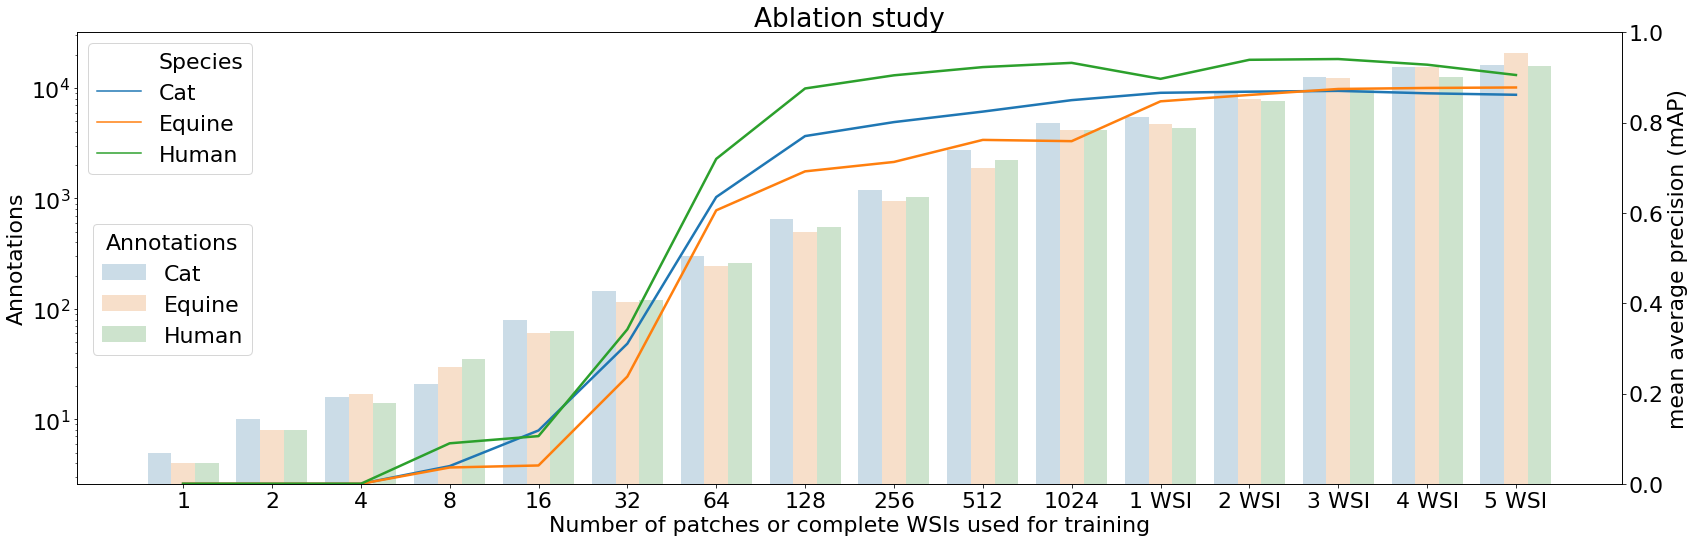

In [66]:
f, (ax1) = plt.subplots(1, 1, figsize=(24, 8), sharex=True) #, ax2, ax3


sns.barplot(data=combined, x="Patches", y="Annotations",  ax=ax1, hue="Species", alpha=0.25) #  ax=ax1
ax1.set(yscale="log")
ax1.legend(bbox_to_anchor=(0.12,0.6), title="Annotations") #loc=l, 
#ax1.get_legend().remove()
ax1.set_xlabel('Number of patches or complete WSIs used for training')

ax2 = ax1.twinx()

sns.lineplot(data=combined, x="Patches", y="Score", ax=ax2, hue="Species", sort = False, linewidth=2.5) #, sort = False
ax2.set(ylim=(0, 1))
ax2.set_title('Ablation study')
ax2.set_ylabel('mean average precision (mAP)')
#ax2.legend(bbox_to_anchor=(0.12,1), title="mAP")


plt.tight_layout()
plt.savefig('AblationStudy_log.pdf') 

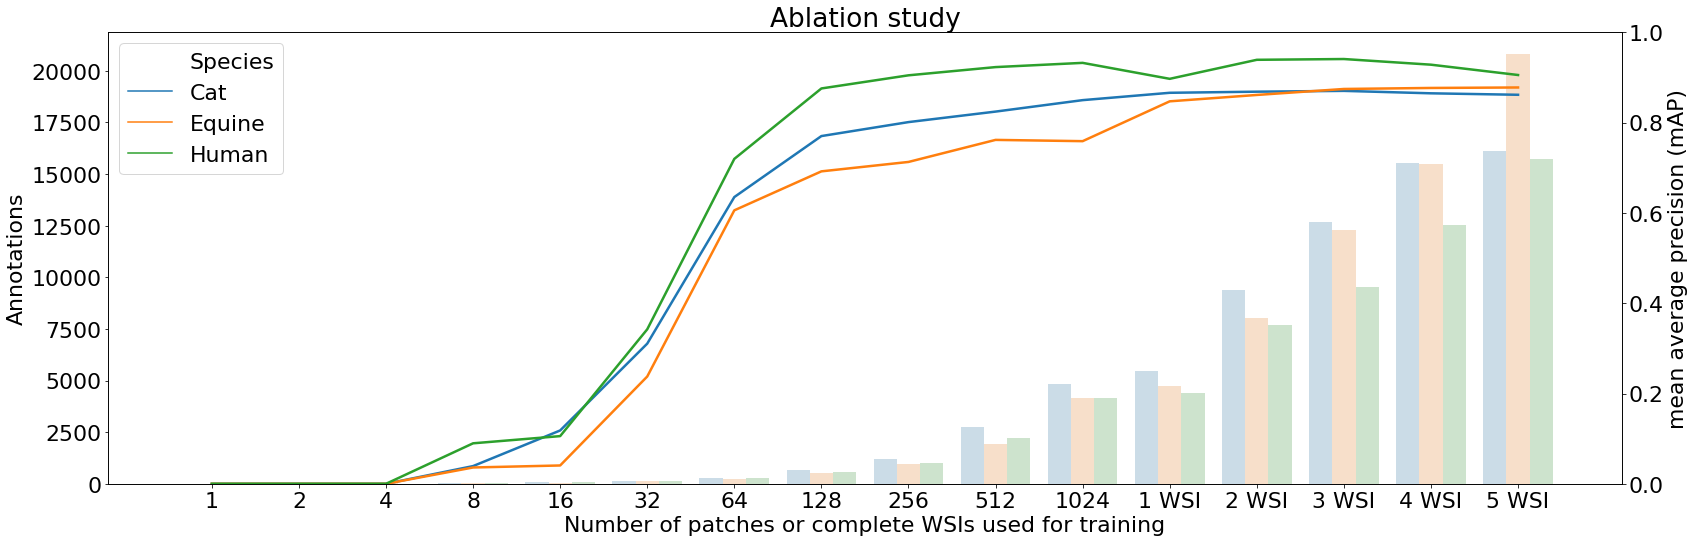

In [51]:
f, (ax1) = plt.subplots(1, 1, figsize=(24, 8), sharex=True) #, ax2, ax3


sns.barplot(data=combined, x="Patches", y="Annotations",  ax=ax1, hue="Species", alpha=0.25) #  ax=ax1
#ax1.set(yscale="log")
ax1.get_legend().remove()
ax1.set_xlabel('Number of patches or complete WSIs used for training')

ax2 = ax1.twinx()

sns.lineplot(data=combined, x="Patches", y="Score", ax=ax2, hue="Species", sort = False, linewidth=2.5) #, sort = False
ax2.set(ylim=(0, 1))
ax2.set_title('Ablation study')
ax2.set_ylabel('mean average precision (mAP)')


plt.tight_layout()
plt.savefig('AblationStudy.pdf') 